<a href="https://colab.research.google.com/github/Vani-Nigam07/Battery_DS/blob/main/battery_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture --no-display
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
#-----------------------------------------------------##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn import ensemble
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/Copy of battery_ml (1).csv')
dataset.head()

,Unnamed: 0,dq_min,dq_mean,dq_variance,dq_skewness,dq_kurtosis,slope_100_2,intercept_100_2,discharge_capacity_2,discharge_capacity_100,...,slope_100_91,intercept_100_91,ave_chg_time_5_1,max_temp_100_2,min_temp_100_2,Integral_temp_100_2,integral_resistance_2,minimum_IR,difference_IR_100_2,cycle_life
0,0,-0.008460,-0.002873,0.000010,-0.532058,-1.348312,-0.000214,1.091381,1.070689,1.075913,...,0.000046,1.071447,13.374894,31.632496,31.266918,18.742036,0.016742,0.0,-0.000075,1852
1,1,-0.011004,-0.004100,0.000010,-0.429375,-1.029116,0.000007,1.080926,1.075301,1.080630,...,-0.000037,1.084382,13.409150,31.376623,31.076239,19.743747,0.017039,0.0,-0.000042,2160
2,2,-0.017216,-0.004487,0.000018,-1.080194,0.348637,0.000011,1.084805,1.079922,1.084940,...,-0.000040,1.088961,13.358242,31.447081,31.146742,19.985985,0.016868,0.0,-0.000014,2237
3,3,-0.018961,-0.007456,0.000036,-0.439050,-1.095416,0.000018,1.084030,1.079723,1.084750,...,-0.000002,1.084960,12.025140,29.982986,29.857000,18.640968,0.016370,0.0,0.000039,1434
4,4,-0.013958,-0.005750,0.000023,-0.362548,-1.333831,0.000020,1.081825,1.078417,1.082646,...,-0.000034,1.085988,12.041851,31.433310,31.181360,21.154489,0.016787,0.0,-0.000053,1709


In [4]:
dataset.columns[1:]

Index(['dq_min', 'dq_mean', 'dq_variance', 'dq_skewness', 'dq_kurtosis',
       'slope_100_2', 'intercept_100_2', 'discharge_capacity_2',
       'discharge_capacity_100', 'diff_QD_n_2', 'slope_100_91',
       'intercept_100_91', 'ave_chg_time_5_1', 'max_temp_100_2',
       'min_temp_100_2', 'Integral_temp_100_2', 'integral_resistance_2',
       'minimum_IR', 'difference_IR_100_2', 'cycle_life'],
      dtype='object')

In [5]:
len(dataset)

124

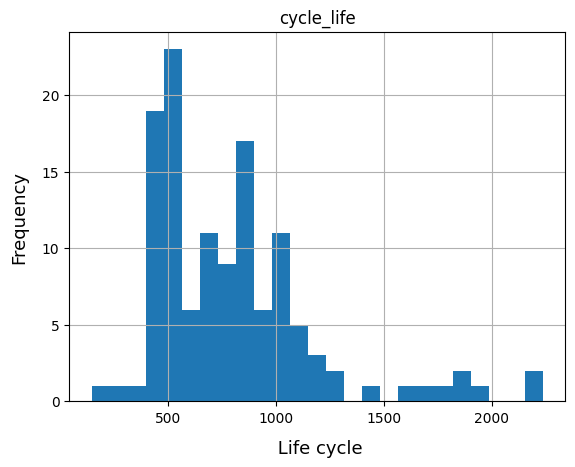

In [6]:
ax=dataset.hist(column='cycle_life',bins=25)
ax = ax[-1]

for x in ax:

      x.set_xlabel(" Life cycle", labelpad=10, size=13)
      x.set_ylabel("Frequency", labelpad=10, size=13)

In [7]:
type(ax)

numpy.ndarray

<Axes: xlabel='cycle_life', ylabel='Count'>

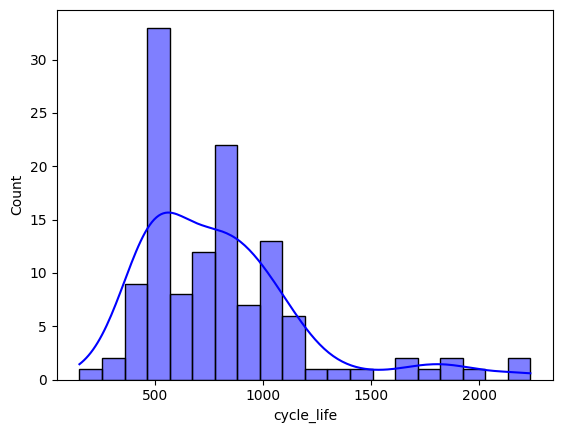

In [8]:
import seaborn as sns
sns.histplot(dataset['cycle_life'],bins=20,kde=True,color='blue')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


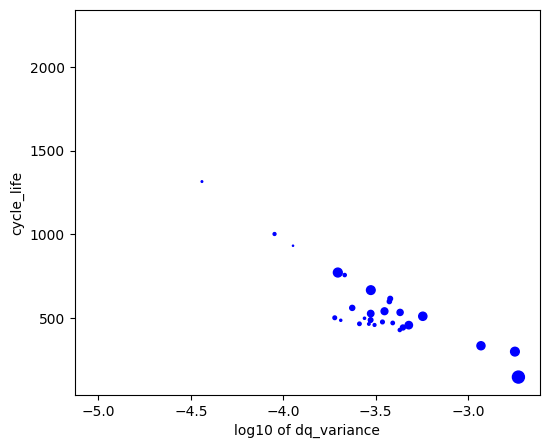

In [9]:
plt.figure(figsize=(6, 5))
plt.scatter( np.log10(dataset['dq_variance']), dataset['cycle_life'], c = 'blue', s= 80*dataset['dq_skewness'])

plt.xlabel('log10 of dq_variance')
plt.ylabel('cycle_life')
plt.show()

In [10]:
correlation_matrix = np.corrcoef(np.log10(dataset['dq_variance']),dataset['cycle_life'])
correlation = correlation_matrix[0, 1]
correlation

-0.8897427366448428

In [11]:
correlation_matrix

array([[ 1.        , -0.88974274],
       [-0.88974274,  1.        ]])

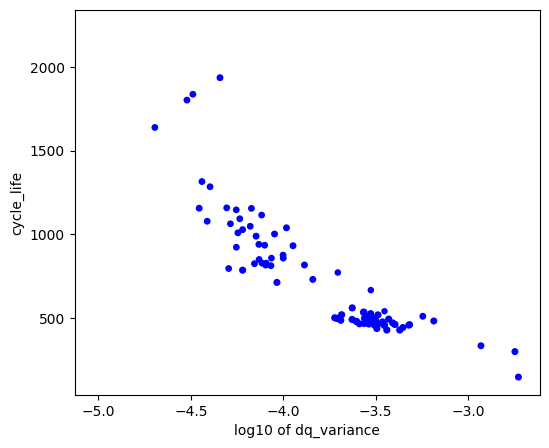

In [12]:
plt.figure(figsize=(6, 5))
plt.scatter( np.log10(dataset['dq_variance']), dataset['cycle_life'], c = 'blue', s= 1000*dataset['minimum_IR'])

plt.xlabel('log10 of dq_variance')
plt.ylabel('cycle_life')
plt.show()

In [13]:
correlation_matrix = np.corrcoef(np.log10(dataset['dq_variance']),dataset['cycle_life'])
correlation = correlation_matrix[0, 1]
correlation

-0.8897427366448428

In [14]:
print("*********** Original data/ Simple represenation of cycle life*******************")
print(dataset['cycle_life'].describe())
print("skew : ",skew(dataset['cycle_life']))
print("kurt : ",kurtosis(dataset['cycle_life']))




*********** Original data/ Simple represenation of cycle life*******************
count     124.000000
mean      801.637097
std       379.717082
min       148.000000
25%       498.750000
50%       736.500000
75%       946.500000
max      2237.000000
Name: cycle_life, dtype: float64
skew :  1.5722118774617826
kurt :  2.9001076537372352


In [15]:
#Selecting Features and Target,  X1=features, Y1=Target
X1=dataset.drop(["cycle_life",'Unnamed: 0'],axis=1)

In [16]:
X1.head()

,dq_min,dq_mean,dq_variance,dq_skewness,dq_kurtosis,slope_100_2,intercept_100_2,discharge_capacity_2,discharge_capacity_100,diff_QD_n_2,slope_100_91,intercept_100_91,ave_chg_time_5_1,max_temp_100_2,min_temp_100_2,Integral_temp_100_2,integral_resistance_2,minimum_IR,difference_IR_100_2
0,-0.008460,-0.002873,0.000010,-0.532058,-1.348312,-0.000214,1.091381,1.070689,1.075913,0.468365,0.000046,1.071447,13.374894,31.632496,31.266918,18.742036,0.016742,0.0,-0.000075
1,-0.011004,-0.004100,0.000010,-0.429375,-1.029116,0.000007,1.080926,1.075301,1.080630,0.009288,-0.000037,1.084382,13.409150,31.376623,31.076239,19.743747,0.017039,0.0,-0.000042
2,-0.017216,-0.004487,0.000018,-1.080194,0.348637,0.000011,1.084805,1.079922,1.084940,0.008131,-0.000040,1.088961,13.358242,31.447081,31.146742,19.985985,0.016868,0.0,-0.000014
3,-0.018961,-0.007456,0.000036,-0.439050,-1.095416,0.000018,1.084030,1.079723,1.084750,0.006530,-0.000002,1.084960,12.025140,29.982986,29.857000,18.640968,0.016370,0.0,0.000039
4,-0.013958,-0.005750,0.000023,-0.362548,-1.333831,0.000020,1.081825,1.078417,1.082646,0.005900,-0.000034,1.085988,12.041851,31.433310,31.181360,21.154489,0.016787,0.0,-0.000053


In [17]:
##------Selecting the features that we think are needed (agnostically ousing calculations)--------

X1=X1[['dq_min','dq_variance','slope_100_2','intercept_100_2',
    'discharge_capacity_2','ave_chg_time_5_1','Integral_temp_100_2',
   'minimum_IR','difference_IR_100_2']]

In [18]:
X1['dq_variance']=np.log10(X1['dq_variance'])

In [19]:
Y1=dataset["cycle_life"]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X1[0:82], Y1[0:82], test_size = 0.4, random_state=1000)

In [21]:
len(X_train)

49

In [22]:
X_val = X1[83:123]
Y_val = Y1[83:123]

# MODELS:

In [23]:
model=ElasticNet()
model.fit(X_train,Y_train)

ElasticNet()

In [24]:
##### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 190.92541176821885
R2 score is 0.6854173680537726


In [25]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 243.5131897989677
R2 score is 0.6165777800090462


## VISUALISING


<ipython-input-28-09c13102ca43>:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')


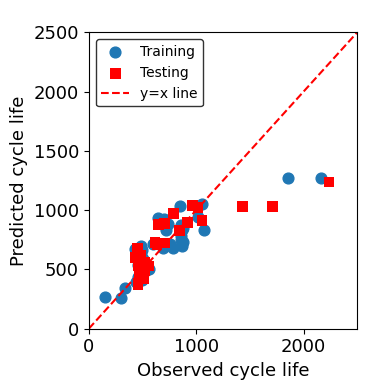

In [28]:
#### define your data plot here
plt.figure(figsize=(4,4),dpi=100)
plt.title(' ', fontsize=13)
#### define your data plot here
plt.xlim(0,2500)

plt.ylim((0,2500))

plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Testing',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)


plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')
plt.tight_layout()
leg = plt.legend()
leg.get_frame().set_edgecolor('black')

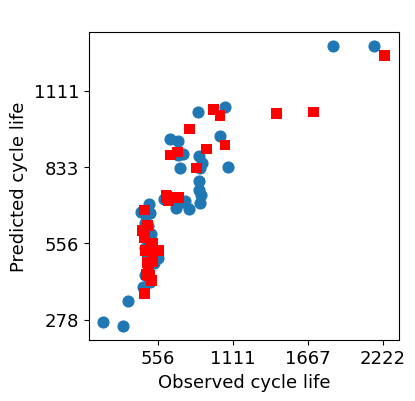

In [27]:
plt.figure(figsize=(4,4),dpi=100)
plt.title(' ', fontsize=13)
plt.xticks(np.linspace(0,5000,10,endpoint=True))
plt.yticks(np.linspace(0,2500,10,endpoint=True))


plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Testing',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
p1 = np.polyfit(Y_train, y_train_predict,1)

## ElasticNetCV

In [29]:
from sklearn.linear_model import ElasticNetCV


alpha_x=np.linspace(0.01,1,100)
l1_ratio_x=np.linspace(0,0.5,1000)


regr = ElasticNetCV(n_alphas=100,alphas=alpha_x,eps=0.005,l1_ratio=l1_ratio_x,cv=5, random_state=11110,max_iter=5000)
regr.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1271263.605021205, tolerance: 528.2524974358975
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did 

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66...
       0.48298298, 0.48348348, 0.48398398, 0.48448448, 0.48498498,
       0.48548549, 0.48598599, 0.48648649, 0.48698699, 0.48748749,
       0.48798799, 0.48848849, 0.48898899, 0.48948949, 0.48998999,
       0.49049049, 0.49099099, 0.49149149, 0.49199199, 0.49249249,
       0.49299299, 0.49349349, 0.49399399, 0.49449449, 0.49499499,
       0.4954955 , 0.495996  , 0.4964965 , 0.496997  , 0.4974975 ,
       0.497998  , 0.4984985 , 0.498999  , 0.4994995 , 0.5       ]),
             max_iter=5000, random_state=11110)

In [30]:
regr.coef_

array([-1.00141520e+02, -5.40991501e+02, -8.09907401e-02,  8.54070169e+01,
        6.44576318e+01,  1.18419261e+02, -1.01702889e+00, -6.93203898e+01,
       -6.42547351e-01])